In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

df = pd.read_csv('movies_dataset.csv')
print(df)

                                 title    1    2    3    4    5    6    7  \
0    10 Things I Hate About You (1999)  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1                  12 Angry Men (1957)  0.0  0.0  0.0  5.0  0.0  0.0  0.0   
2         2001: A Space Odyssey (1968)  0.0  0.0  0.0  0.0  0.0  0.0  4.0   
3                 28 Days Later (2002)  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4                           300 (2007)  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
..                                 ...  ...  ...  ...  ...  ...  ...  ...   
445            X2: X-Men United (2003)  0.0  0.0  0.0  0.0  0.0  0.0  4.0   
446             You've Got Mail (1998)  0.0  0.0  0.5  0.0  0.0  0.0  0.0   
447          Young Frankenstein (1974)  5.0  0.0  0.0  0.0  0.0  0.0  0.0   
448                  Zombieland (2009)  0.0  3.0  0.0  0.0  0.0  0.0  0.0   
449                   Zoolander (2001)  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       8    9  ...  601  602  603  604  605  606  607  608  609  610  
0   

# **Data Preprocessing**

In [2]:
# If there are any Null values replace them with 0.0
df.fillna(value=0.0, inplace=True)

In [3]:
# Preprocess the titles
df['title'] = df['title'].str.strip()

df['movieId'] = range(0, len(df))
orig_df = df.copy()

In [4]:
# Drop the title column
df.drop(columns=['title'], inplace=True)

print(df)

       1    2    3    4    5    6    7    8    9   10  ...  602  603  604  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  3.0  0.0   
1    0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2    0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...  0.0  5.0  0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
445  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
446  0.0  0.0  0.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  2.0  0.0   
447  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  5.0  0.0   
448  0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
449  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

     605  606  607  608  609  610  movieId  
0    5.0  0.0  0.0  0.0  0.0  

# **Data Exploration**

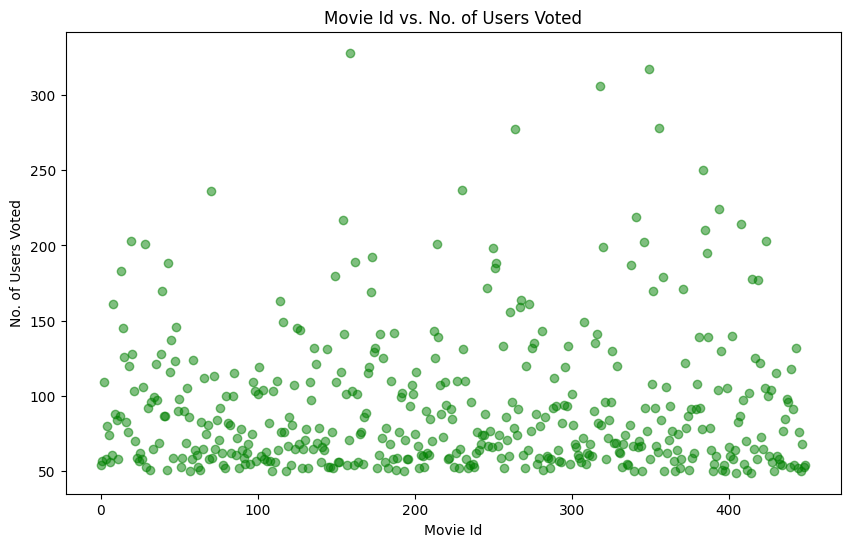

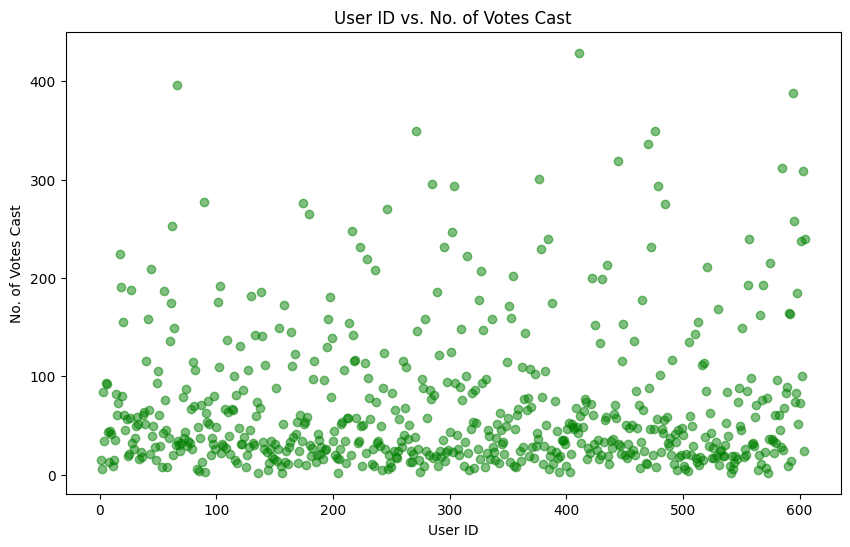

In [5]:
# Only Ratings df
ratings_df = df.drop(columns=['movieId'])

# Calculate the number of users who voted for each movie
num_users_voted = ratings_df.iloc[:, 1:].astype(bool).sum(axis=1)  # Count non-zero ratings per row

# Calculate the number of votes cast by each user
num_votes_cast = ratings_df.iloc[:, 1:].astype(bool).sum(axis=0)  # Count non-zero ratings per column

# Plotting scatter plot between MovieId and No. of users voted
plt.figure(figsize=(10, 6))
plt.scatter(df['movieId'], num_users_voted, color='green', alpha=0.5)
plt.title('Movie Id vs. No. of Users Voted')
plt.xlabel('Movie Id')
plt.ylabel('No. of Users Voted')
plt.show()

# Plotting scatter plot between UserId and No. of votes cast
plt.figure(figsize=(10, 6))
plt.scatter(range(1, len(num_votes_cast) + 1), num_votes_cast, color='green', alpha=0.5)
plt.title('User ID vs. No. of Votes Cast')
plt.xlabel('User ID')
plt.ylabel('No. of Votes Cast')
plt.show()

# **Model Development**

In [6]:
# Using CSR Matrix for dataset since our dataset is quite sparse
csr_mat = csr_matrix(ratings_df.values)

In [7]:
# We will be using Item-based Collaborative Filtering

# KNN Model
knn = NearestNeighbors(metric='cosine', n_jobs=-1)

# Train the model
knn.fit(csr_mat)

NearestNeighbors(metric='cosine', n_jobs=-1)

# Testing the Model


In [8]:
# Given a previously liked Movie as input,
# This function gives recommended movie as output
def get_movie_recommendation(movie_name):
    found_movies_list = orig_df[orig_df['title'] == movie_name]
    if len(found_movies_list) > 0:
        movieId = found_movies_list.iloc[0]['movieId']
        movieId = df[df['movieId'] == movieId].index[0]
        distances, indices = knn.kneighbors(csr_mat[movieId], n_neighbors=2)  # n_neighbors = 2 to get just one recommendation
        rec_movie_dist = distances.squeeze()[1]
        rec_movie_index = indices.squeeze()[1]  # Get the index of the recommended movie (the second closest, first one is the input movie itself)
        movieId = df.iloc[rec_movie_index]['movieId']
        idx = orig_df[orig_df['movieId'] == movieId].index[0]
        recommended_movie = orig_df.iloc[idx]['title']
        return recommended_movie, rec_movie_dist
    else:
        return "No movies found. Please check your input", ""


In [9]:
moviename = 'American Pie (1999)'
recommended_movie, similarity = get_movie_recommendation(moviename)
print(recommended_movie, similarity)

Austin Powers: The Spy Who Shagged Me (1999) 0.36623888449933817


In [10]:
moviename = 'Iron Man (2008)'
recommended_movie, similarity = get_movie_recommendation(moviename)
print(recommended_movie, similarity)

Dark Knight, The (2008) 0.32946219051576764


In [11]:
moviename = 'Memento (2000)'
recommended_movie, similarity = get_movie_recommendation(moviename)
print(recommended_movie, similarity)

Fight Club (1999) 0.33040704494686746


In [12]:
moviename = 'Some Like It Hot (1959)'
recommended_movie, similarity = get_movie_recommendation(moviename)
print(recommended_movie, similarity)

Rear Window (1954) 0.513661396977013


# **Filtering Dataset to Remove Noise/Outliers**

In [13]:
# Reducing Noise/Outliers from the dataset

df = orig_df.drop(columns=['title'])

# Filter movies based on the minimum number of users
# At least 30 users should have rated a movie for it to be classified as a qualified movie
qualified_movies = num_users_voted[num_users_voted >= 30].index

# Filter users based on the minimum number of votes cast
# At least 50 ratings should have been given by a user for him to be classified as a qualified user
qualified_users = num_votes_cast[num_votes_cast >= 50].index

# Apply filters
df = df[df.index.isin(qualified_movies)]
df = df[qualified_users]

# Merge the filtered DataFrame with the 'movieId' column from the original DataFrame based on the index
df = pd.merge(df, orig_df[['movieId']], left_index=True, right_index=True)

print(df)

       4    6    7   15   16   17   18   19   20   21  ...  601  602  603  \
0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  ...  0.0  0.0  3.0   
1    5.0  0.0  0.0  0.0  4.0  0.0  5.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
2    0.0  0.0  4.0  0.0  0.0  0.0  4.0  3.0  0.0  0.0  ...  0.0  0.0  5.0   
3    0.0  0.0  0.0  3.5  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4    0.0  0.0  0.0  0.0  0.0  0.0  3.5  0.0  0.0  3.5  ...  0.0  0.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
445  0.0  0.0  4.0  0.0  0.0  0.0  4.0  0.0  4.0  0.0  ...  0.0  0.0  0.0   
446  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  4.0  ...  0.0  0.0  2.0   
447  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0  0.0  ...  0.0  0.0  5.0   
448  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
449  0.0  0.0  0.0  0.0  0.0  0.0  3.0  0.0  3.5  0.0  ...  0.0  0.0  0.0   

     604  605  606  607  608  610  movieId  
0    0.0  5.0  0.0  0.0  0.0  

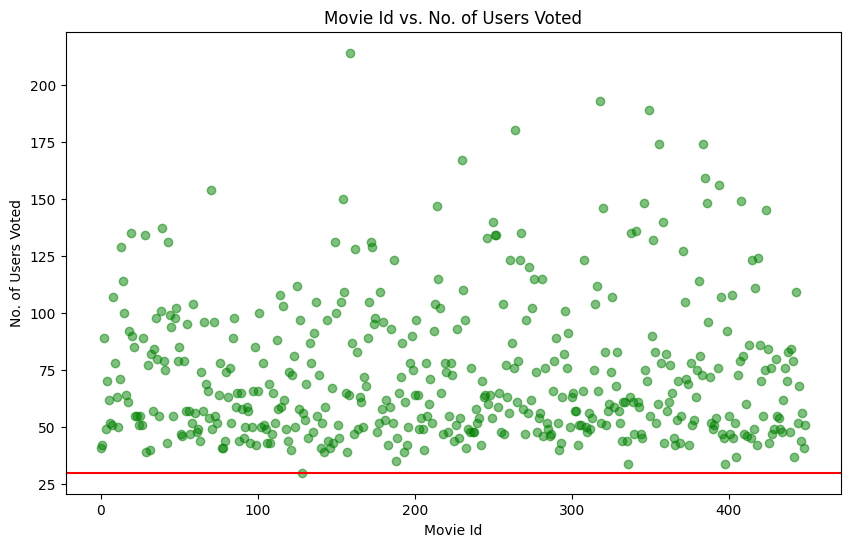

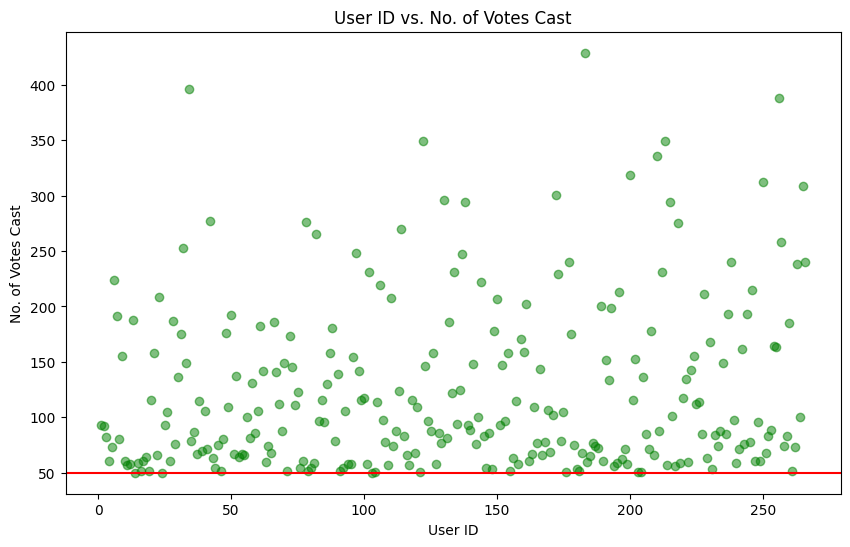

In [14]:
# Only Ratings df
ratings_df = df.drop(columns=['movieId'])

# Calculate the number of users who voted for each movie
num_users_voted = ratings_df.iloc[:, 1:].astype(bool).sum(axis=1)  # Count non-zero ratings per row

# Calculate the number of votes cast by each user
num_votes_cast = ratings_df.iloc[:, 1:].astype(bool).sum(axis=0)  # Count non-zero ratings per column

# Plotting scatter plot between MovieId and No. of users voted
plt.figure(figsize=(10, 6))
plt.scatter(df['movieId'], num_users_voted, color='green', alpha=0.5)
plt.title('Movie Id vs. No. of Users Voted')
plt.axhline(y=30,color='r')
plt.xlabel('Movie Id')
plt.ylabel('No. of Users Voted')
plt.show()

# Plotting scatter plot between UserId and No. of votes cast
plt.figure(figsize=(10, 6))
plt.scatter(range(1, len(num_votes_cast) + 1), num_votes_cast, color='green', alpha=0.5)
plt.title('User ID vs. No. of Votes Cast')
plt.axhline(y=50,color='r')
plt.xlabel('User ID')
plt.ylabel('No. of Votes Cast')
plt.show()

# **Final Model Development**

In [15]:
# Using CSR Matrix for dataset since our dataset is quite sparse
csr_mat = csr_matrix(ratings_df.values)

In [16]:
# KNN Model
knn = NearestNeighbors(metric='cosine', n_jobs=-1)

# Train the model
knn.fit(csr_mat)

NearestNeighbors(metric='cosine', n_jobs=-1)

# **Model Testing**

In [17]:
moviename = 'American Pie (1999)'
recommended_movie, similarity = get_movie_recommendation(moviename)
print(recommended_movie, similarity)

Austin Powers: The Spy Who Shagged Me (1999) 0.3271082654524873


In [18]:
moviename = 'Iron Man (2008)'
recommended_movie, similarity = get_movie_recommendation(moviename)
print(recommended_movie, similarity)

Dark Knight, The (2008) 0.24019004841992464


In [19]:
moviename = 'Memento (2000)'
recommended_movie, similarity = get_movie_recommendation(moviename)
print(recommended_movie, similarity)

Fight Club (1999) 0.22571879685733331


In [20]:
moviename = 'Some Like It Hot (1959)'
recommended_movie, similarity = get_movie_recommendation(moviename)
print(recommended_movie, similarity)

Rear Window (1954) 0.4143848880670341
